# Import library and Data

In [1]:
import pandas as pd
from nltk import word_tokenize
from nltk.tokenize import TweetTokenizer
import re
import numpy as np

df = pd.read_csv('Input/Bug report.csv')
# df2 = pd.read_csv('hoax5.csv')

In [4]:
#Gabungkan data menjadi satu dataframe
# df = pd.concat([df1, df2]).drop_duplicates().reset_index(drop=True)
df['Concat'] = df.Summary +" "+ df.Description
# data.to_csv("./Output/data_concat.csv")
df = df[:200] 
df.shape
len(df) #jumlah tweet

200

In [5]:
print(df.head())
print('panjang tweet = ', len(df))

                                             Summary  \
0  [DEV] Admin can add user permissions with end ...   
1  [DEV] Missing Input Validation for Endpoint Ad...   
2  [STG][PP][Launcher][Recharge] There's ellipsis...   
3  [DEV][AP][VersusEvil] Registered User not coun...   
4  [DEV] Fix Issues for Endpoint Admin Delete Use...   

                                         Description  \
0  SDET tried to test endpoint for happy case :  ...   
1  SDET tried to test endpoint for negative case ...   
2                                                  -   
3  Registered User not count in Daily Active User...   
4  SDET tried to test endpoint DELETE /iam/v3/adm...   

                                              Concat  
0  [DEV] Admin can add user permissions with end ...  
1  [DEV] Missing Input Validation for Endpoint Ad...  
2  [STG][PP][Launcher][Recharge] There's ellipsis...  
3  [DEV][AP][VersusEvil] Registered User not coun...  
4  [DEV] Fix Issues for Endpoint Admin Delete Use..

# Text Processing

In [6]:
#take tweet column
tweet = df.iloc[:,2]

In [7]:
Tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True)

tweet_new = tweet.apply(Tokenizer.tokenize)

print(tweet_new)

0      [[, DEV, ], Admin, can, add, user, permissions...
1      [[, DEV, ], Missing, Input, Validation, for, E...
2      [[, STG, ], [, PP, ], [, Launcher, ], [, Recha...
3      [[, DEV, ], [, AP, ], [, VersusEvil, ], Regist...
4      [[, DEV, ], Fix, Issues, for, Endpoint, Admin,...
                             ...                        
195    [[, STG, ], [, AP, ], Out, of, bound, label, o...
196    [[, STG, ], [, AP, ], [, Demo, Game, ], Buy, b...
197    [[, STG, ], [, AP, ], Store, information, list...
198    [[, STG, ], Disabled, Item, missing, from, ", ...
199    [[, STG, ], [, PP, ], Unable, to, purchase, it...
Name: Concat, Length: 200, dtype: object


In [8]:
# #definisi emoji

# #HappyEmoticons
# emoticons_happy = set([
#     ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
#     ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
#     '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
#     'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
#     '<3'
#     ])

# # Sad Emoticons
# emoticons_sad = set([
#     ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
#     ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
#     ':c', ':{', '>:\\', ';('
#     ])

# #Emoji patterns
# emoji_pattern = re.compile("["
#          u"\U0001F600-\U0001F64F"  # emoticons
#          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#          u"\U0001F680-\U0001F6FF"  # transport & map symbols
#          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#          u"\U00002702-\U000027B0"
#          u"\U000024C2-\U0001F251"
#          "]+", flags=re.UNICODE)

# #combine sad and happy emoticons
# emoticons = emoticons_happy.union(emoticons_sad)

In [9]:
#process cleaning tweets
processed_tweets = []

for tweet in range(0, len(tweet_new)):     
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(tweet_new[tweet]))
    
    # Remove number
    processed_tweet = re.sub(r'\d+', ' ', processed_tweet)
    
    #removing mentions
    processed_tweet = re.sub(r':', '', processed_tweet)
    processed_tweet = re.sub(r'‚Ä¶', '', processed_tweet)
    
    #replace consecutive non-ASCII characters with a space
    processed_tweet = re.sub(r'[^\x00-\x7F]+',' ', processed_tweet)
    
    #remove https
    processed_tweet = re.sub(r'http\S+|www.\S+', ' ', processed_tweet)
    
    #remove RT text
    processed_tweet = re.sub(r'RT', ' ', processed_tweet)
    
    #remove co text
    processed_tweet = re.sub(r'co', ' ', processed_tweet)
    
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet)
    
    #remove emoji
#     processed_tweet = emoji_pattern.sub(r'', processed_tweet)
    
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    processed_tweets.append(processed_tweet)

In [10]:
for i in range(0, len(processed_tweets)):
    print(i, processed_tweets[i])

0  dev admin can add user permissions with end lon in resource value sdet tried to test endpoint for happy case post iam admin namespaces namespace users userid permissions on body request resource value inputed with end lon and able to add user permissions image png thumbnail 
1  dev missing input validation for endpoint admin add update user permissions sdet tried to test endpoint for negative case post iam admin namespaces namespace users userid permissions put iam admin namespaces namespace users userid permissions and found there are some failed test for following cases user not found failed unable to parse request body failed invalid namespace character user id less than characters user id more than characters user id with hypen user id with whitespace it caused by this endpoint not implemented input validation yet 
2  stg pp launcher recharge there ellipsis symbol in the buy for button in chinese language 
3  dev ap versusevil registered user not unt in daily active user after l

# Remove data

In [11]:
#remove duplicate
seen = set()
result = []
for item in processed_tweets:
    if item not in seen:
        seen.add(item)
        result.append(item)

In [12]:
len(result)

200

In [13]:
# #remove unused data
# remove = [' alexsandria wa langsung bikin scajul yuk no php no hoax hayalanjomblo pijatenak ztcwd btlt ',
        
#          ' won ni muslim ni halimat emi gan shey wolimat ',
#          ' buat yg mau sesi bodypressure amazonlady dripda tnya bb tb endingnya hoax silahkan dilihat dgn seksama selama bb ewt vazy ',
#          ' availonly vcs member info rr dm wa naylaa tunggu yaa bisa test vc ba hoax auto block siuzms cau ',
#          ' pak kwteeac ',
#          ' bantu temen open perawan yang serius aja minat hub gak basa basi jual perawan open bo perawan real ma h reegeat ',
#          ' o ugbojs ']

# final = list(set(result).difference(set(remove)))

# print(len(final))

In [14]:
#remove unused data
# final = list(np.delete(result, [[2,4,6,7,8,12,13,16,17,18,
#                            19,20,22,24,25,30,31,32,33,37,
#                            38,39,42,46,48,51,54,56,57,58,
#                            62,63,64,66,67,70,71,75,76,77,
#                            79,82,83,87,92,93,95,98,99,106,
#                            109,112,113,118,119,120,121,122,123,125,
#                            128,132,134,135,138,139,140,146,151,153,
#                            156,160,164,165,167,169,172,174,175,177,
#                            180,184,185,]], axis=0))
# print(len(final))

In [13]:
# for i in range(0, len(final)):
#     print(i, final[i])

# Change word

In [16]:
# #dict word that will change
# dic = {
#     'yg':'yang', 'gitu':'begitu', 'tak':'tidak', 'kalo':'kalau', 'emng':'memang','awmu':'kamu',
#     'km':'kamu', 'khan':'kan', 'mulu' : 'melulu', 'aja' : 'saja', 'atut' : 'takut',
#     'fulang' : 'pulang', 'koq' : 'kok', 'fpiexpired' : 'fpi expired', 'ngakui' : 'mengakui',
#     'klo' : 'kalau', 'jado' : 'jadi', 'tangkep' : 'tangkap', 'pake' : 'pakai', 'lo' : 'kamu',
#     'gebleg' : 'bodoh', 'kemakan' : 'termakan', 'gua' : 'saya', 'gedeg' : 'kesal', 'liat' : 'lihat',
#     'hoa' : 'hoax', 'clear' : 'selesai', 'bgt' : 'banget', 'kerana' : 'karena', 'anatara' : 'antara',
#     'rakan' : 'rekan', 'jgn' : 'jangan', 'nnti' : 'nanti', 'gue':'saya', 'shambar':'sambar',
#     'mentri' : 'menteri', 'ajjh' : 'aja', 'gk' : 'tidak', 'botaq' : 'botak', 'gak' : 'tidak',
#     'jokowitakutfpi' : 'jokowi takut fpi', 'skrg' : 'sekarang', 'doang' : 'saja', 'kontem' : 'konten',
#     'ngga' : 'tidak', 'menyebr' : 'menyebar', 'up' : 'naikkan', 'rumot' : 'rumor', 'mrk':'mereka',
#     'polit' : 'politik', 'sarat' : 'sara', 'ledekan' : 'ejekan', 'mo' : 'mau', 'lu' : 'kamu',
#     'ntar' : 'sebentar', 'mbibbb' : 'habib', 'hobby' : 'hobi', 'gabisa' : 'tidak bisa',
#     'bertelingan':'bertelinga', 'emank':'memang', 'knp':'kenapa', 'hrs':'harus', 'taonan':'tahunan',
#     'ngk':'tidak', 'dr':'dari', 'syp':'siapa', 'nie':'nih', 'semataaa':'semata', 'ni':'ini',
#     'ad':'ada', 'dblas':'dibalas', 'tau':'tahu', 'terkut':'terkutuk', 'negri':'negeri',
#     'dg':'dengan', 'khormatan':'kehormatan', 'ngontrak':'mengontrak', 'anter':'antar', 'pke':'pakai',
#     'eagl':'elang', 'khilap':'khilaf', 'abis':'habis', 'pic':'gambar', 'joged':'joget',
#     'kali':'sekali', 'tu':'itu', 'sy':'saya', 'jg':'juga', 'cm':'cuma', 'ciptain':'ciptakan',
#     'iyalaj':'iyalah', 'ak':'aku', 'etmin':'admin', 'blg':'bilang', 'gaada':'tidak ada',
#     'inya':'nya', 'ga':'tidak', 'gus':'gusur', 'tolakhoaxdanprovokasi':'tolak hoax dan provokasi',
#     'ngaku':'mengaku', 'sdh':'sudah', 'ttg':'tentang', 'jkw':'jokowi', 'trus':'terus',
#     'kehorma':'kehormatan', 'gimana':'bagaimana', 'pann':'apaan', 'ngarangnya':'mengarangnya',
#     'so':'jadi', 'please':'tolong', 'send':'kirim', 'your':'kamu', 'on':'di', 'descriptions':'deskripsi',
#     'smw':'semua', 'jadiin':'jadikan', 'twt':'twitter', 'menggeneralisir':'menggeneralisasi',
#     'tp':'tapi', 'knapa':'kenapa', 'kemarintidak':'kemarin tidak', 'tentan':'beredar',
#     'riji':'rizieq', 'rijik':'rizieq', 'krn':'karena', 'neg':'negeri', 'alesan':'alasan'
# }

# result_final = [re.sub(r'\b\w+\b', lambda m: dic.get(m.group(), m.group()), s) for s in final]

In [18]:
for i in range(0, len(result)):
    print(i, result[i])

0  dev admin can add user permissions with end lon in resource value sdet tried to test endpoint for happy case post iam admin namespaces namespace users userid permissions on body request resource value inputed with end lon and able to add user permissions image png thumbnail 
1  dev missing input validation for endpoint admin add update user permissions sdet tried to test endpoint for negative case post iam admin namespaces namespace users userid permissions put iam admin namespaces namespace users userid permissions and found there are some failed test for following cases user not found failed unable to parse request body failed invalid namespace character user id less than characters user id more than characters user id with hypen user id with whitespace it caused by this endpoint not implemented input validation yet 
2  stg pp launcher recharge there ellipsis symbol in the buy for button in chinese language 
3  dev ap versusevil registered user not unt in daily active user after l

# Stemming

In [16]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [17]:
steam = []
for w in result_final:
    word = stemmer.stem(w)
    steam.append(word)

In [19]:
# for i in range(0, len(steam)):
#     print(i, steam[i])
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()
result_final = result.apply(lambda x:[wordnet.lemmatize(i,pos='v') for i in x])

AttributeError: 'list' object has no attribute 'apply'

# Stopword

In [19]:
#proses stopword
data = open('stopword_indo.txt', 'r')
text_stop = data.read()
stopword = text_stop.split()

stop_extends = ['cc', 't', 'cbrdz', 'ap', 'nga', 'ya', 'lha', 'mena', 'htt', 'rzp', 'an', 'tm',
               'axocyagfq', 'cluwz', 'opma', 'u', 'kxcyd', 'zpro', 'fqiupnjc', 'yekan', 'men',
               'ba', 'puan', 'oala', 'mf', 'iwoocucico', 'gm', 'vmhqhrc', 'bighit', 'xd', 'js',
               'je', 'tqwglygzp', 'ch', 'vcgnvv', 'br', 'vilive', 'fanart', 'fancafe', 'me',
               'k', 'yk', 'row', 'bxb', 'spmjombgxj', 'f', 'cv', 'nwfi', 'wag', 'stm', 'lxac', 
               'dffat', 'sp', 'fbmxgyos', 'rdwn', 'riaz', 'tns', 'sqsfc', 'moknrteiz', 'suk',
               'swixsvm', 'ah', 'fuja', 'wvwc', 'ptl', 'ngtpcoopdd', 'woiiiy', 'wooiii',
               'wqbccyhbh', 'lozhixiv', 'jinjja', 'bwakakakakakak', 'wkwk', 'kiquf', 'dufs',
               'sanak', 'hehehe', 'aiqguim', 'ww', 'lohh', 'an', 'eh', 'ppg', 'wwwapk',
               'wlsbbfjzhw', 'sg', 'rqsv', 'ggd', 'w', 'obe', 'sim', 'a', 'hfe', 'ylr', 'gz',
               'wfa', 'sfs', 'sn', 'fcrlb', 'hmwxqlen', 'epjlap', 'dto', 'jhsrarisif', 'bzvouzyfvv',
               'hhlldg', 'uov', 'laah', 'bebaskanlutfhi', 'bebaskanluthfi', 'dll', 'sih', 'nih',
               'nya']

for i in stop_extends:
    stopword.append(i)

#delete important word from stopword
stop_remove = ["jangan", "tidak", 'bisa', 'jawab', 'bukan']

for i in stop_remove:
    stopword.remove(i)

In [20]:
word_tokens = [word_tokenize(i) for i in steam]

In [21]:
filter = []
for i in range(0, len(word_tokens)):
    new_words = [word for word in word_tokens[i] if word not in stopword]
    filter.append(new_words)

In [22]:
for i in range(0, len(filter)):
    print(i, filter[i])

0 ['oknum', 'polisi', 'brutal', 'kabar', 'oknum', 'aparat', 'sebar', 'hoax', 'kabar']
1 ['hoax', 'ala', 'kampret', 'ketua', 'kpk', 'agus', 'raharjo', 'tube', 'tidak', 'bukti', 'duga']
2 ['lho', 'aktivis', 'tuju', 'hoax']
3 ['hoax']
4 ['hoax', 'bener', 'ngetik']
5 ['hahaha', 'hoax', 'lagu', 'nyanyi']
6 ['fpi', 'kerja', 'bikin', 'onar', 'provokasi', 'fitnah', 'hoax', 'melulu', 'ketua', 'takut', 'pulang', 'fpi', 'expired']
7 ['kasat', 'reskrimnya', 'bilang', 'hoax', 'kapolresnya', 'maaf', 'kapolres', 'binjai']
8 ['arti', 'hoax', 'dm', 'dm', 'sebar']
9 ['arang', 'bagus', 'mah', 'hoax', 'tangkap', 'cemar', 'nama']
10 ['orang', 'bikin', 'hoax', 'islam', 'pas', 'maaf', 'pakai', 'kopiah', 'biar', 'anggap']
11 ['alas', 'enak', 'banget', 'aparat', 'bikin', 'hoax', 'dasar', 'bodoh']
12 ['perhati', 'jangan', 'makan', 'hoax', 'hembus', 'tidak', 'negosiasi']
13 ['metro', 'tipu', 'pantes', 'temen', 'kesal', 'lihat', 'metro', 'nyata', 'alas', 'bikin', 'fitnah', 'hoax']
14 ['maaf', 'selesai', 'sebar', 

# Labeling sentiment

In [23]:
#list sentiment
labels = ['negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'negatif', 'negatif',
        'negatif', 'positif', 'negatif', 'negatif', 'positif', 'positif', 'positif', 'positif', 'negatif', 'positif',
        'negatif', 'positif', 'positif', 'negatif', 'positif', 'negatif', 'positif', 'negatif', 'positif', 'negatif',
        'negatif', 'positif', 'positif', 'negatif', 'positif', 'positif', 'positif', 'positif', 'positif', 'positif',
        'negatif', 'positif', 'positif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'negatif',
        'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'positif', 'positif', 'negatif', 'positif', 'positif',
        'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'negatif', 'positif', 'negatif',
        'positif', 'negatif', 'positif', 'negatif', 'positif', 'positif', 'negatif', 'positif', 'positif', 'negatif',
        'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif', 'positif', 'positif', 'negatif', 'negatif',
        'negatif', 'positif', 'positif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif', 'positif',
        'positif', 'negatif', 'negatif']

In [24]:
len(labels)

104

In [25]:
from collections import Counter

Counter(labels)

Counter({'negatif': 60, 'positif': 44})

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

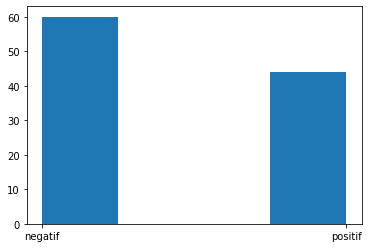

In [27]:
plt.hist(labels, bins=4)
plt.show()

In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(set(labels)))
print(list(le.classes_))
num_labels = le.transform(labels) 

['negatif', 'positif']


# Bag of Words

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
stopword_new = set([w for w in stopword])
print ("Jumlah stop words:", len(stopword))

Jumlah stop words: 866


In [31]:
count_vect = CountVectorizer(ngram_range=(1,1), stop_words=stopword)
tweet_result = count_vect.fit_transform(steam)

C:\Users\Reza Pahlevi Sofyan\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweet_result, num_labels, test_size=0.25, random_state=16)
print(X_train.shape)

(78, 344)


In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

clf1 = MultinomialNB().fit(X_train, y_train)
Predict = clf1.predict(X_test)

In [34]:
print ("Accuracy pada test data:", accuracy_score(Predict, y_test))
print ("Precision baseline pada test data:", precision_score(Predict, y_test))
print ("Recall baseline pada test data:", recall_score(Predict, y_test))
print ("F1 baseline pada test data:", f1_score(Predict, y_test))
tn_dev, fp_dev, fn_dev, tp_dev = confusion_matrix(Predict, y_test).ravel()
TPR_dev = tp_dev/(tp_dev+fn_dev)
FPR_dev = fp_dev/(fp_dev+tn_dev)
print("TPR baseline:", TPR_dev, "dan FRP baseline:", FPR_dev)

Accuracy pada test data: 0.5769230769230769
Precision baseline pada test data: 0.4444444444444444
Recall baseline pada test data: 0.4
F1 baseline pada test data: 0.4210526315789474
TPR baseline: 0.4 dan FRP baseline: 0.3125


# TF_IDF

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [36]:
tfidf_vectorizer=TfidfVectorizer(ngram_range=(1,1), stop_words=stopword_new)
 
tfidf_result=tfidf_vectorizer.fit_transform(steam)

C:\Users\Reza Pahlevi Sofyan\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [37]:
x_train, x_test, Y_train, Y_test = train_test_split(tfidf_result, num_labels, test_size=0.25, random_state=28)
print(x_train.shape)

(78, 344)


In [38]:
#Naive Bayes
clf1 = MultinomialNB().fit(x_train, Y_train)
Predict1 = clf1.predict(x_test)

In [39]:
print ("Accuracy pada test data:", accuracy_score(Predict1, Y_test))
print ("Precision baseline pada test data:", precision_score(Predict1, Y_test))
print ("Recall baseline pada test data:", recall_score(Predict1, Y_test))
print ("F1 baseline pada test data:", f1_score(Predict1, Y_test))
tn_dev, fp_dev, fn_dev, tp_dev = confusion_matrix(Predict1, Y_test).ravel()
TPR_dev = tp_dev/(tp_dev+fn_dev)
FPR_dev = fp_dev/(fp_dev+tn_dev)
print("TPR baseline:", TPR_dev, "dan FRP baseline:", FPR_dev)

Accuracy pada test data: 0.7307692307692307
Precision baseline pada test data: 0.46153846153846156
Recall baseline pada test data: 1.0
F1 baseline pada test data: 0.631578947368421
TPR baseline: 1.0 dan FRP baseline: 0.35
